## 📅 Day 2: Exploratory Data Analysis (EDA)

This notebook continues from **Data Understanding**, where we explored the dataset structure and basic statistics.

🔗 [Notebook: Data Understanding](Loan_prediction_day1_Data_understanding.ipynb)

---

### 🎯 Goals of This Notebook:
- Understand the distribution of categorical and numerical features
- Detect outliers and identify missing values
- Analyze relationships between input features and the target variable (`Loan_Status`)
- Form hypotheses for feature engineering and modeling

---

### 🛠️ Today's Tasks:
- **Univariate Analysis**: Value counts, histograms
- **Bivariate Analysis**: Correlation, groupby comparisons
- **Visual Exploration** using Seaborn and Matplotlib


In [2]:
import pandas as pd
df=pd.read_csv('Loandataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Here start the part of the EDA

In [5]:
# check column data types & Unique Values
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### 📊 Distribution of Categorical Features

To understand the data balance and detect any skewness in categorical variables, we'll visualize their distribution using count plots.


Gender
Male      489
Female    112
Name: count, dtype: int64


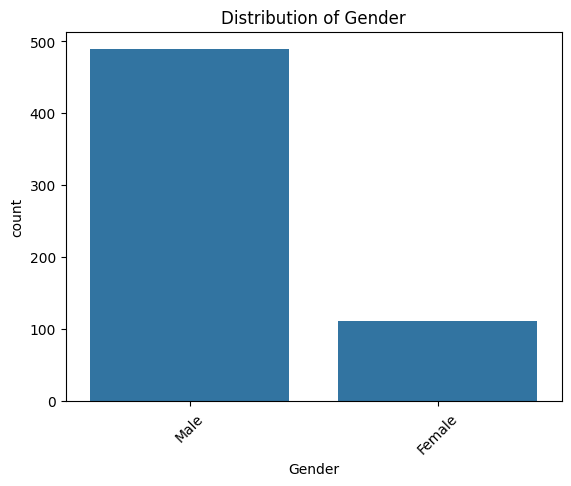

Married
Yes    398
No     213
Name: count, dtype: int64


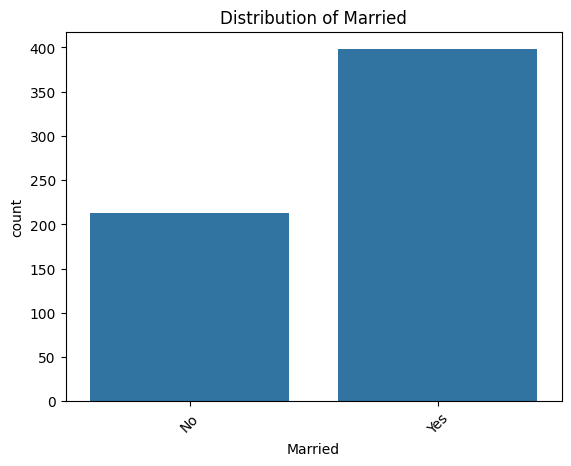

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


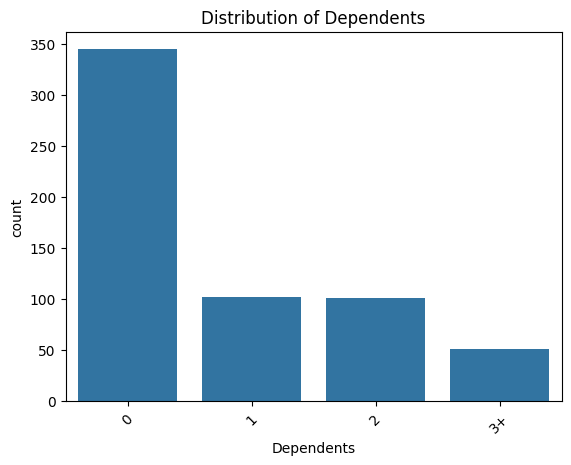

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


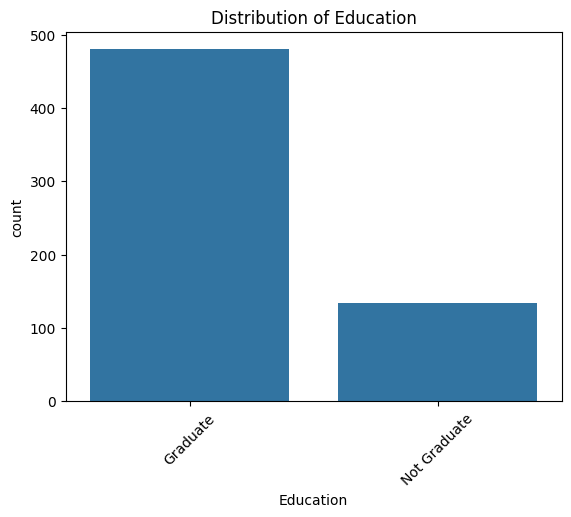

Self_Employed
No     500
Yes     82
Name: count, dtype: int64


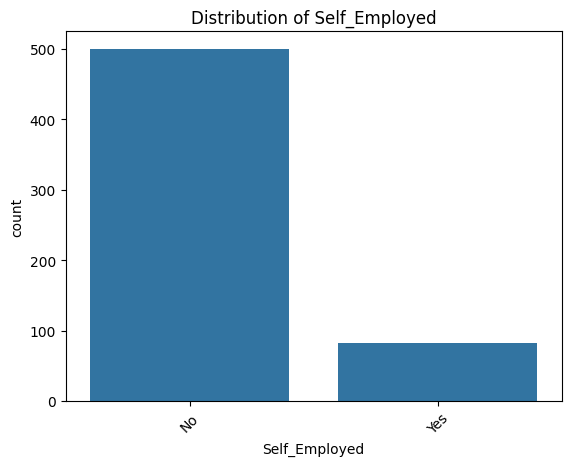

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


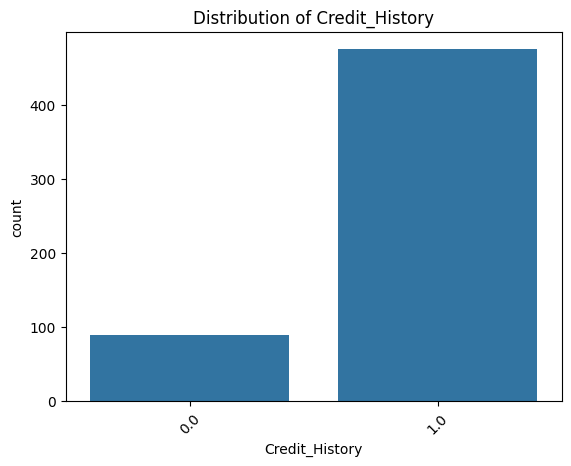

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


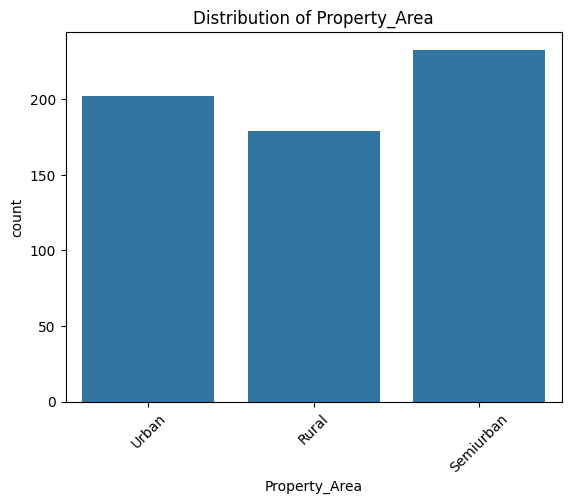

Loan_Status
Y    422
N    192
Name: count, dtype: int64


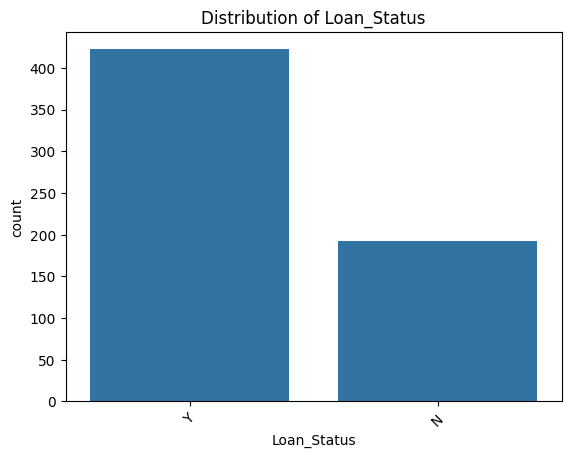

In [10]:
# categorical columns - Value counts & Bar plots
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols=['Gender','Married','Dependents','Education',
                 'Self_Employed','Credit_History','Property_Area','Loan_Status']
for col in categorical_cols:
    print(df[col].value_counts())
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### 🔍 Observations from Categorical Feature Distributions:

- **Gender**: The majority of applicants are male. This may reflect social or economic trends in home loan applications.
- **Married**: Most applicants are married, which might influence the credit decision positively due to combined household income.
- **Dependents**: A significant portion of applicants have 0 dependents, but there’s a notable number with '1', '2', and '3+' as well. Higher dependents might affect loan eligibility.
- **Education**: Most applicants are graduates, suggesting an educated customer base.
- **Self_Employed**: A smaller number of applicants are self-employed, which could impact income stability and loan approval chances.
- **Credit_History**: Majority of applicants have a credit history (value = 1). This feature may have a strong influence on loan approval.
- **Property_Area**: Semiurban areas have the highest number of applicants, followed by Urban and Rural.
- **Loan_Status (Target)**: More loans are approved ('Y') than denied ('N'), though the dataset is slightly imbalanced.

These initial patterns help form hypotheses such as:
- Applicants with credit history, graduate education, and stable employment are more likely to be approved.
- Self-employment or many dependents might negatively impact approval.

We'll investigate these hypotheses in the next steps using correlation analysis and cross-feature comparisons.


## 📊 Numerical Columns – Distribution Analysis
In this section, we explore the distribution of key numerical features using histograms with KDE (Kernel Density Estimation) curves. These plots help us understand the spread, skewness, and potential outliers in the dataset, which is useful for transformations and model selection.

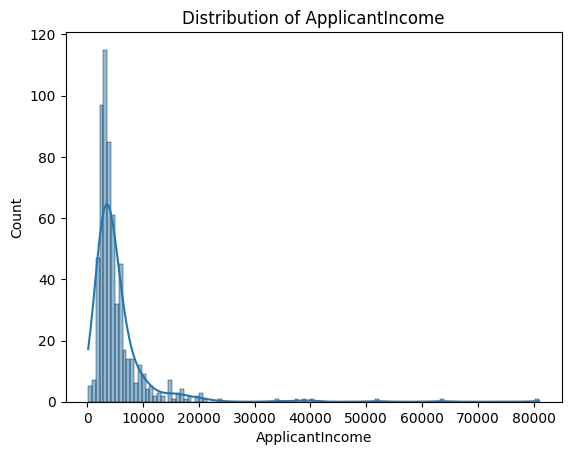

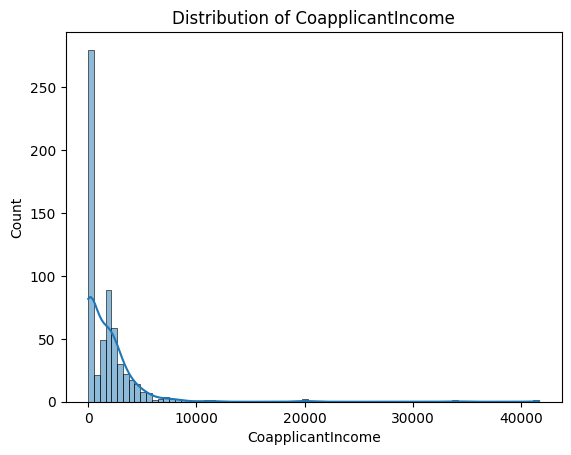

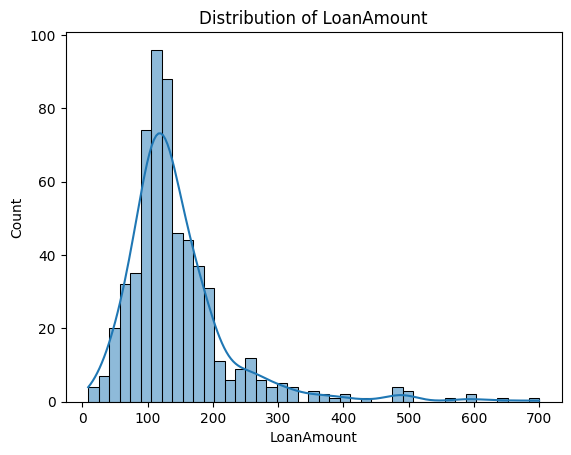

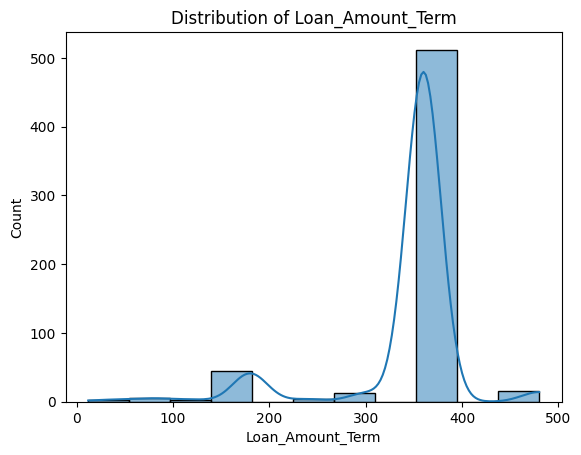

In [13]:
# Numerical Columns-Distribution plots

numerical_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

for col in numerical_cols:
    sns.histplot(df[col].dropna(),kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## 🔍 Observations:
- **ApplicantIncome**: The distribution is right-skewed, with a few applicants earning significantly more than the average. A log transformation might help normalize this.

- **CoapplicantIncome**: Also skewed, and many co-applicants have an income of 0, indicating single applicants or non-earning partners.

- **LoanAmount**: Right-skewed again, with most loans under 250 (in ₹1,000s). Some large outliers exist.

- **Loan_Amount_Term**: Appears to have a few frequent values like 360 months (30 years), indicating standard loan plans.

These distributions indicate potential preprocessing steps like scaling or log transformation to normalize skewed features before feeding them into ML models.

## 📦 Outlier Detection using Boxplots
Before feeding numerical features into machine learning models, it's important to identify and handle outliers, as they can skew the results. Boxplots help us visually inspect for extreme values in each numerical column.📦 Outlier Detection using Boxplots
Before feeding numerical features into machine learning models, it's important to identify and handle outliers, as they can skew the results. Boxplots help us visually inspect for extreme values in each numerical column.

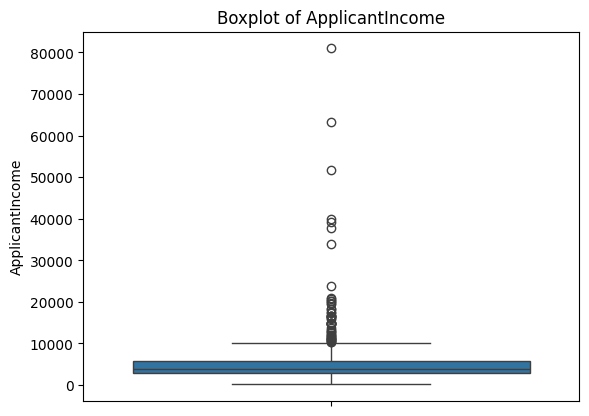

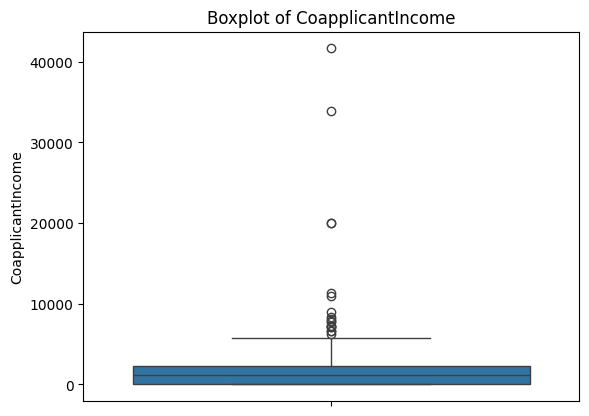

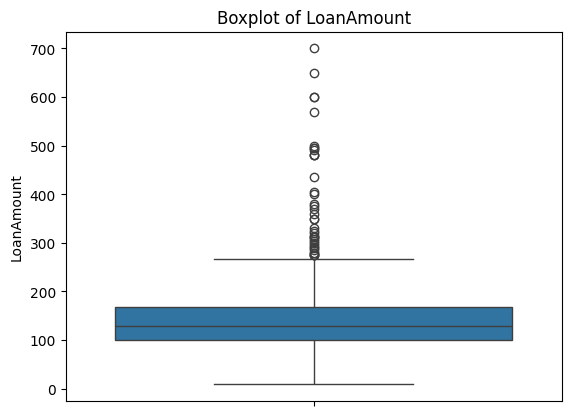

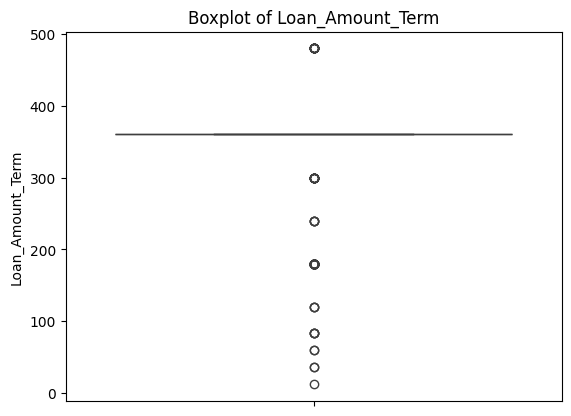

In [16]:
# Boxplot to detect outliers

for col in numerical_cols:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## 🔍 Observations:
- **ApplicantIncome**: Shows several high-value outliers, possibly due to a few applicants earning significantly more than others.

- **CoapplicantIncome**: Also has outliers, but many entries are near zero — indicating either no coapplicant or one with low/no income.

- **LoanAmount**: Contains a few outliers in higher amounts, which might affect model performance.

- **Loan_Amount_Term**: Mostly concentrated around common values like 360, but may include rare values that are outliers.

Handling these outliers (e.g., through capping, transformation, or removal) can improve the robustness of the model.

## 🔗 Correlation Heatmap
Before building our predictive model, it's useful to examine how numerical features are related to each other. A correlation matrix gives a quick overview of linear relationships between variables, helping us:

Identify strongly related features

Detect multicollinearity

Understand which features might influence the target variable

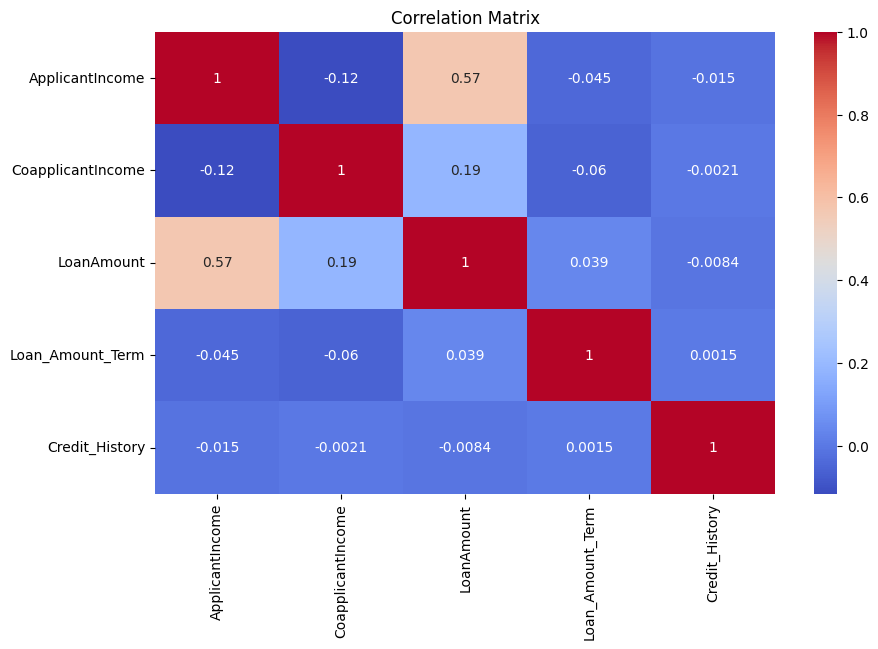

In [20]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 🧠 Insights from Correlation Matrix:
- **ApplicantIncome** and **LoanAmount** show a weak positive correlation, suggesting that income might slightly influence loan size.

- **CoapplicantIncome** also has a small positive correlation with **LoanAmount**, but it's not very strong.

- **Credit_History** shows a moderate positive correlation with **Loan_Status** (our target), indicating that having a good credit history is important for loan approval.

- **Loan_Amount_Term**  shows very weak correlation with other ***variables***.

These correlations help us prioritize features and guide our feature engineering and model selection steps in later stages.

## 📊 Bivariate Analysis with Target Variable (Loan_Status)
To better understand which factors influence loan approval, we examine how each categorical feature interacts with the target variable (Loan_Status). This step helps identify potential predictors for our model by revealing trends in approval rates based on feature values.

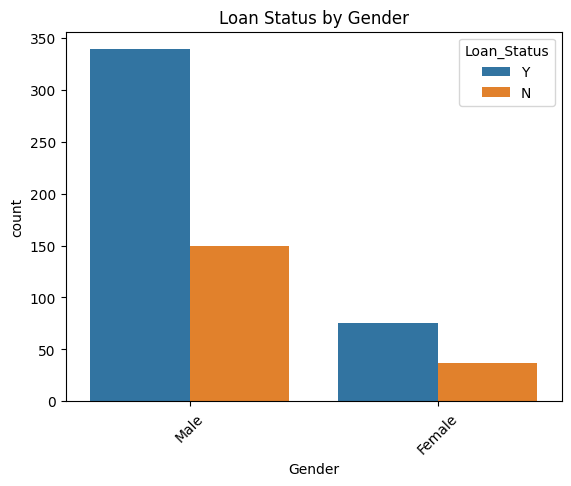

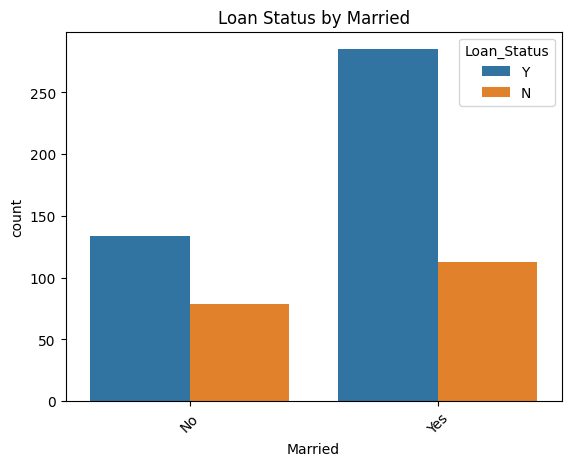

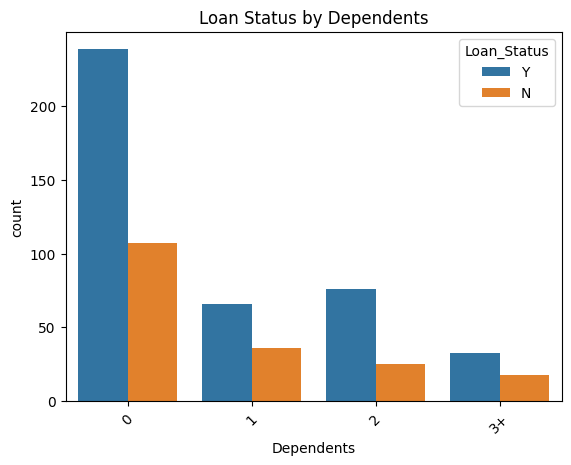

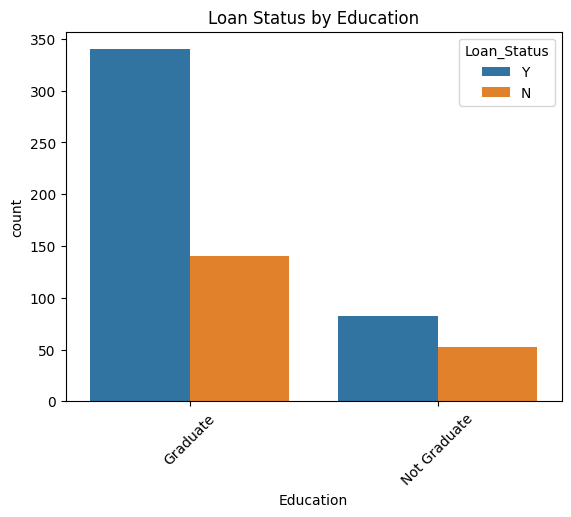

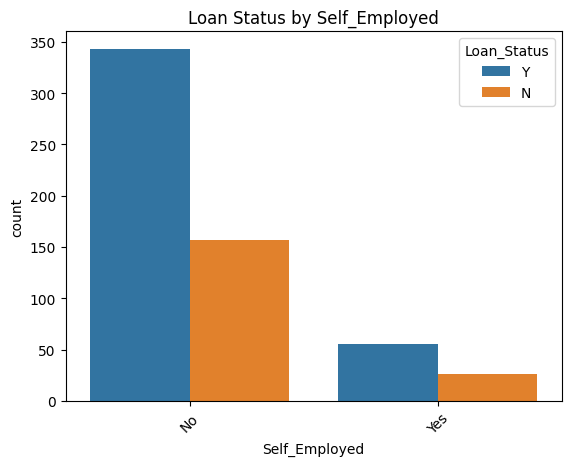

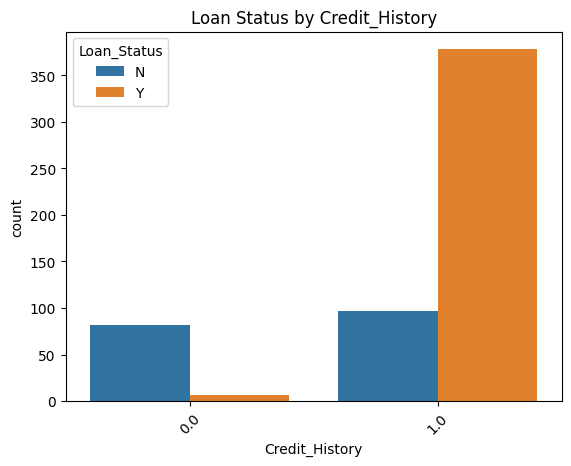

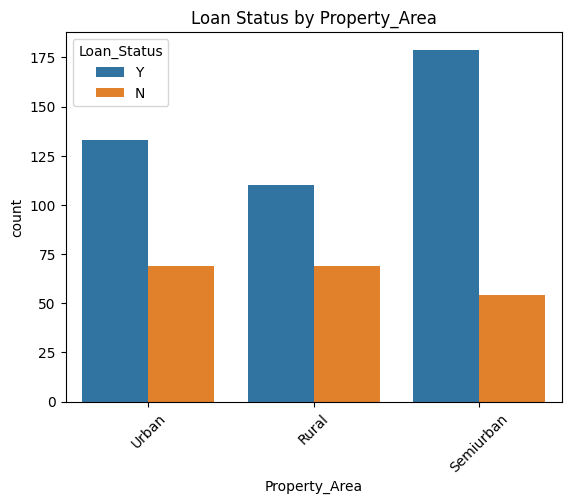

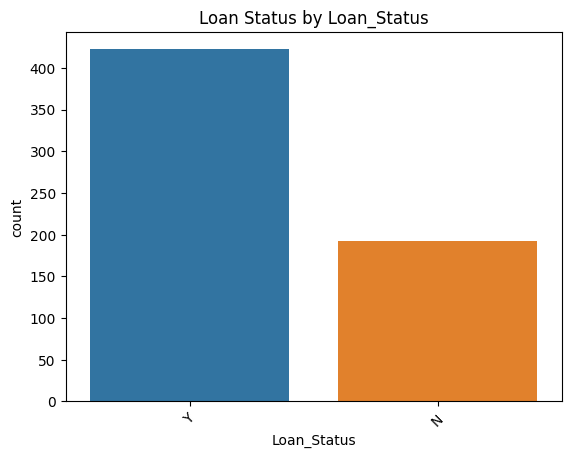

In [25]:
# Bivariate analysis with target value
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='Loan_Status')
    plt.title(f'Loan Status by {col}')
    plt.xticks(rotation=45)
    plt.show()


## 🔍 Observations:
- **Gender**: Male applicants are more in number, but approval rates are fairly similar across genders.

- **Married**: Married applicants appear to have slightly higher approval rates, possibly due to combined household income.

- **Dependents**: Applicants with no or few dependents seem to have higher approval chances. More dependents may increase financial burden.

- **Education**: Graduates have a slightly higher loan approval rate compared to non-graduates.

- **Self_Employed**: Non-self-employed individuals have better approval chances, possibly indicating income stability matters.

- **Credit_History**: A strong differentiator — applicants with a credit history (1) have a significantly higher approval rate.

- **Property_Area**: Semiurban areas have the highest approval rates.

- **Loan_Status**: Visualizing alongside other features gives a clearer picture of how different groups are treated in loan decisions.

These patterns will guide our feature selection and model training phases.

### 📌 Summary of EDA

- Most applicants are male, married, and graduates
- Credit history is a strong signal for loan approval
- Applicant income is skewed; log transformation may help
- Coapplicant income helps improve eligibility in some cases
- Some outliers in `LoanAmount` and `ApplicantIncome` may need handling
- `Loan_Status` is slightly imbalanced

➡️ These insights will guide feature engineering and model selection in Day 3.
